# steps to do data wrangling:
1. Gathering data - Libraries
2. Tools to clean data - Libraries (Assessing data, (EDA))
    1. Dealing with missing values
    2. Correcting errors in the data
       1. outliers removal
          1. Visualization
          2. IQR method
          3. z-score
    3. Droping duplicates
3. Transforming the data
   1. Data normalization
      1. MinMax scalling
      2. Standard Scaler
      3. log Transformation
      4. Winsorization
      5. Z-score normalization
      6. Decimal Scalling 
4. Featured Engineering
5. Organization 
   1. column creation
   2. Renaming columns
6. Saving data

In [65]:
# 1st step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = sns.load_dataset('titanic')

In [67]:
# we have already done EDA in previous notebooks like .head , .info , .describe etc
# now we have clean the data
# checking missing values
df.isnull().sum() / len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [68]:
# remove the column which has more than 70% missing values
df.drop(columns='deck',inplace=True)

In [69]:
# filling missing values of age with the mean of age
df['age'] = df.age.fillna(value=df['age'].mean())

In [70]:
df.isnull().sum() / len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [71]:
df['embarked'] = df.embarked.fillna(value=df['embarked'].mode()[0])

In [72]:
df.isnull().sum() / len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [73]:
df['embark_town'] = df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [74]:
df.isnull().sum() / len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

Now data has no null values

# Outliers removal - Visualization

<Axes: xlabel='sex', ylabel='age'>

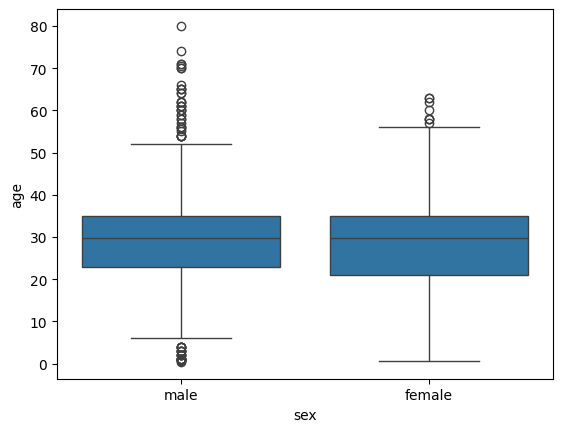

In [75]:
sns.boxplot(data=df, y= 'age' , x= 'sex')

In [76]:
# IQR method:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['age']> lower_bound)&(df['age']< upper_bound)]

In [77]:
df.shape

(825, 14)

In [78]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['fare']> lower_bound)&(df['fare']< upper_bound)]

In [79]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

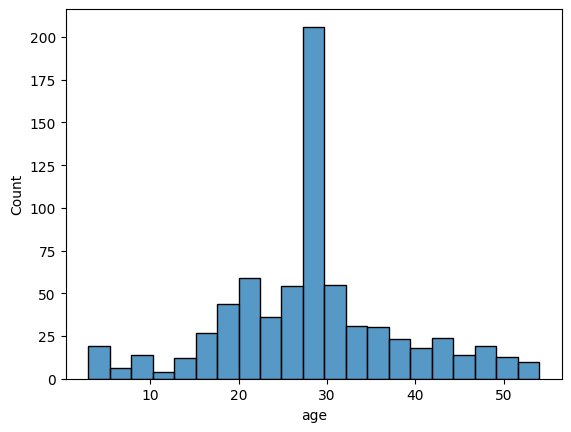

In [80]:
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

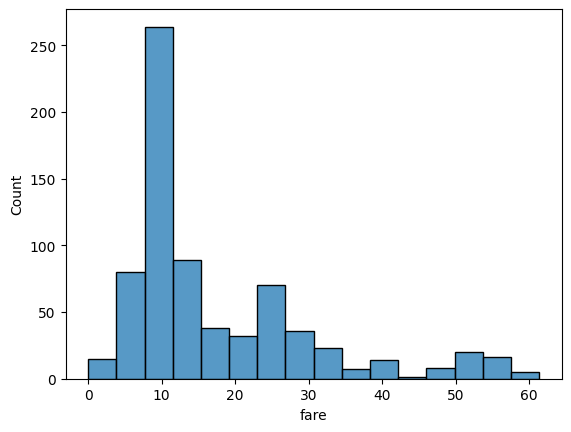

In [81]:
sns.histplot(df['fare'])

In [82]:
# Z-score
from scipy import stats
zscore = np.abs(stats.zscore(df['age']))
threshold = 3
#df = df[(z < threshold).all(axis= 1)]
# assignment to do later on

In [83]:
# finding and dropping duplicates in data
# finding duplicates

df.duplicated().sum()

103

In [84]:
# checking which rows are duplicated
df1 = df[df.duplicated()]
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [85]:
df1.shape

(103, 14)

In [86]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [87]:
df.shape

(615, 14)

### as we have removed attributes with same age, thinking its duplicate, re-check this later

# MinMax Scaler:

In [118]:
# Data normalization
#1 import library
from sklearn.preprocessing import MinMaxScaler
#2 bring data
df
#3 select columns to normalize
cols_to_normalize = ['age',  'fare']
#4 create the scaler function/tool
scaler = MinMaxScaler()
#5 fit data into scaler
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
#6 check the data
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0


In [59]:
df.describe()
# range of minmax scaler i 0-1

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


# Standard Scaler:

In [61]:
# Data normalization
#1 import library
from sklearn.preprocessing import StandardScaler
#2 bring data
df
#3 select columns to normalize
cols_to_normalize = ['age',  'fare']
#4 create the scaler function/tool
scaler = StandardScaler()
#5 fit data into scaler
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
#6 check the data
df

# equation of standard scaler:
# x_standard = (x-mean(x))/std(x)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [63]:
df.describe()
# range of standard scaler i -3 to 3

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


# Log Transformation

In [88]:
kashti = sns.load_dataset('titanic')

In [89]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [95]:
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].mode())

#Log transform
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])
kashti.head()

c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1.128508,1,0,0.683603,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1.291320,1,0,1.450832,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,1.181143,0,0,0.727559,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1.268453,1,0,1.379314,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,1.268453,0,0,0.735091,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

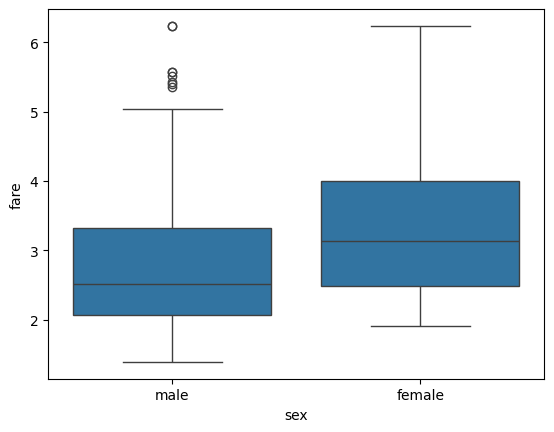

In [93]:
sns.boxplot(data=kashti, x='sex',y='fare')

<Axes: xlabel='age', ylabel='Count'>

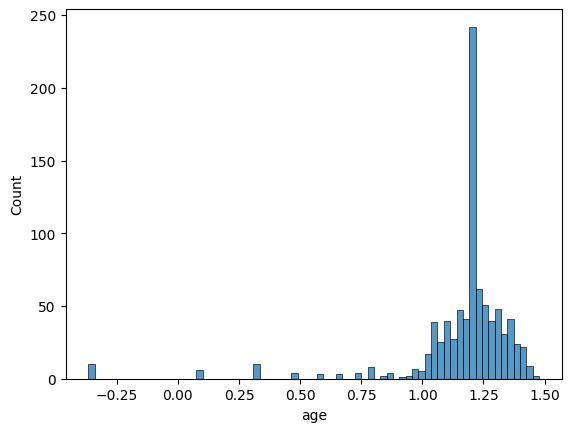

In [96]:
sns.histplot(kashti['age'])

<Axes: xlabel='age', ylabel='Count'>

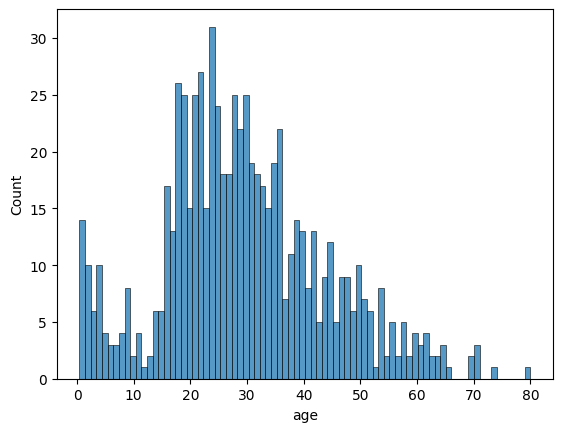

In [99]:
kashti = sns.load_dataset('titanic')
sns.histplot(kashti['age'],bins=80)
# it shows log transforming method is not good for age, so we will use another method

# Organizing the data

In [102]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [103]:
# columns parch and sibsp is not making sence so we will combine these two columns 
df['family_size'] =  df['parch'] + df['sibsp']

In [105]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
885,0,3,female,39.000000,0,5,29.125,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,19.000000,0,0,30.000,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,29.699118,1,2,23.450,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,26.000000,0,0,30.000,C,First,man,True,Cherbourg,yes,True,0
890,0,3,male,32.000000,0,0,7.750,Q,Third,man,True,Queenstown,no,True,0


c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


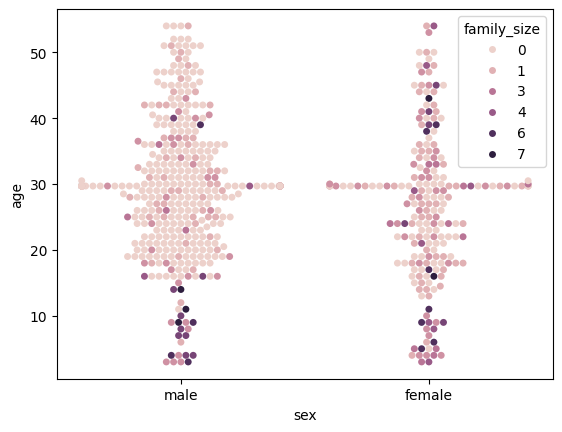

In [106]:
# checking family size through plot
sns.swarmplot(data=df, x='sex',y='age',hue='family_size')

c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='survived', ylabel='age'>

c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


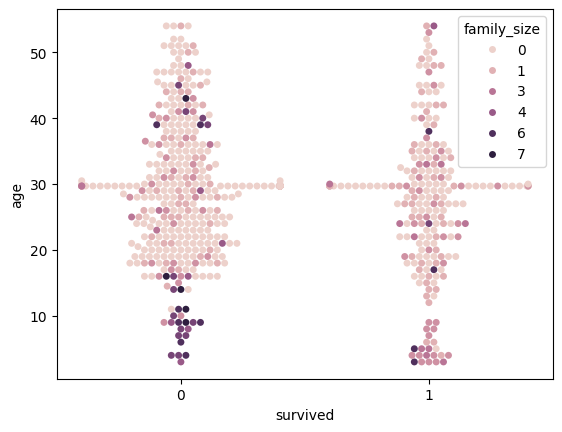

In [107]:
sns.swarmplot(data=df, x='survived',y='age',hue='family_size')

In [108]:
# renaming columns to give more sence to data
df = df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [113]:
# povit table
import pandas as pd
table = pd.pivot_table(df,values='fare',index='pclass',
                       columns= 'survival', aggfunc=np.sum)
table

C:\Users\Asim Mehdi\AppData\Local\Temp\ipykernel_19836\297409259.py:3: FutureWarning: The provided callable <function sum at 0x0000028FB85D1EE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df,values='fare',index='pclass',


survival,0,1
pclass,,
1,1354.6707,2150.5295
2,1269.6458,1509.5917
3,3720.1580,1275.7375


In [115]:
table = pd.pivot_table(df,values='fare',index='who',
                       columns= 'survival', aggfunc=np.mean)
table

C:\Users\Asim Mehdi\AppData\Local\Temp\ipykernel_19836\2595063913.py:1: FutureWarning: The provided callable <function mean at 0x0000028FB85D2FC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df,values='fare',index='who',


survival,0,1
who,,
child,28.475336,20.996810
man,15.091745,22.044227
woman,16.450864,22.646381


<Axes: xlabel='fare', ylabel='age'>

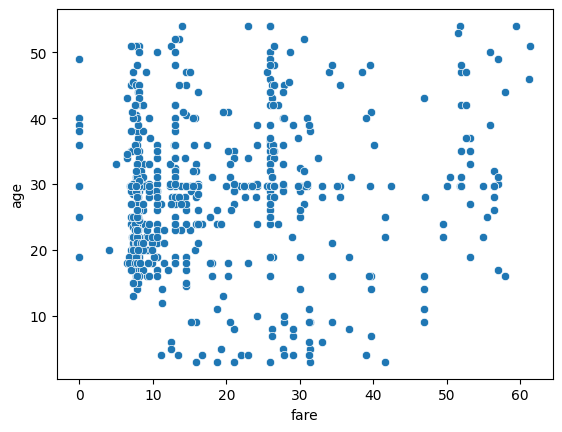

In [116]:
sns.scatterplot(df,x='fare',y='age')

In [121]:
df['family_size'] =  df['parch'] + df['sibsp']
df.tail()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0
890,0,3,male,0.568627,0,0,0.126264,Q,Third,man,True,Queenstown,no,True,0


# Saving wrangled data

In [122]:
df.to_csv('preprocessed_data.csv')